# Import nessary modules

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

## Visualize data with mathplot lib

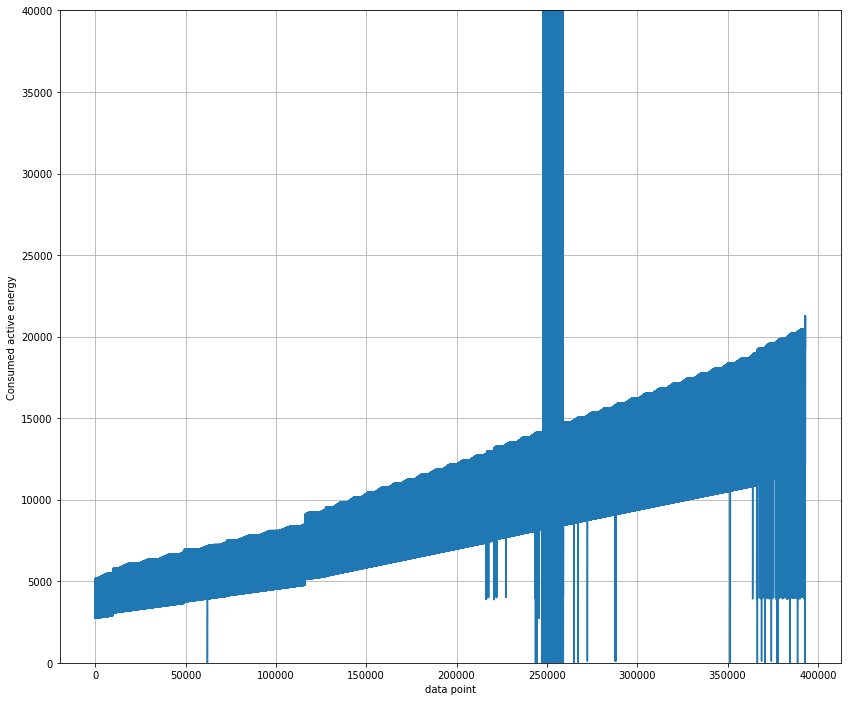

In [91]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

data = pd.read_csv('power_test.csv',index_col=0)

#combine Consumed_active_energy_kW and Consumed_active_energy_W

#target = data['Consumed_active_energy_kW']
#target2 = data['Consumed_active_energy_W']
#del data['Consumed_active_energy_kW']
#del data['Consumed_active_energy_W']

new_target = (target*1000+target2)/1000
data['Consumed_active_energy_kW'] = new_target

fig = plt.figure(figsize=(14,12))
plt.ylim(0,40000)

plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.plot(target.values,label="data")
plt.show()
 

In [92]:
data[:5]

,dev_name,Threephase_Power_Factor,Consumed_apparent_energy_VAh,L2_Current,L1_Active_Power,Consumed_capacitive_reactive_energy_kvarhC,L2_voltage__THD,L1_voltage__THD,L3_voltage__THD,L1_Apparent_Power,...,Consumed_capacitive_reactive_energy_varhC,Cos_L3,Consumed_CO2_emissions,L1_Capacitive_Power,Inductive_Threephase_power,Threephase_Cos,L3_Active_Power,Active_Threephase_Power,Consumed_apparent_energy_kVAh,Consumed_active_energy_kW
Timestamp,,,,,,,,,,,,,,,,,,,,,
16/05/2018 14:41:02,UDB1_ULC_5,-0.93,964.0,7.56,4.12,908.0,0.07,0.09,0.09,4280.0,...,635.0,-94.0,0.0,1000.0,0.00,-0.94,1.76,7.40,2992.0,2833.192
16/05/2018 14:41:16,UDB1_ULC_5,-0.93,993.0,7.52,4.12,908.0,0.07,0.09,0.09,4280.0,...,644.0,-94.0,0.0,1000.0,0.00,-0.94,1.72,7.40,2992.0,2833.246
16/05/2018 14:41:16,UDB2_ULC_6,-0.93,693.0,7.96,3.76,933.0,0.08,0.08,0.08,3920.0,...,80.0,-94.0,0.0,1080.0,0.00,-0.94,1.92,7.36,2908.0,2729.192
16/05/2018 14:41:16,ADB1_CRAC3,1.00,756.0,0.00,0.16,5.0,0.12,0.11,0.12,160.0,...,988.0,100.0,0.0,0.0,0.00,1.00,0.00,0.16,5413.0,5181.486
16/05/2018 14:41:16,ADB1_CRAC4,0.94,619.0,34.16,8.32,0.0,0.13,0.12,0.12,8800.0,...,597.0,93.0,0.0,0.0,7.76,0.94,7.24,23.08,3923.0,3698.044


# Scatter plot

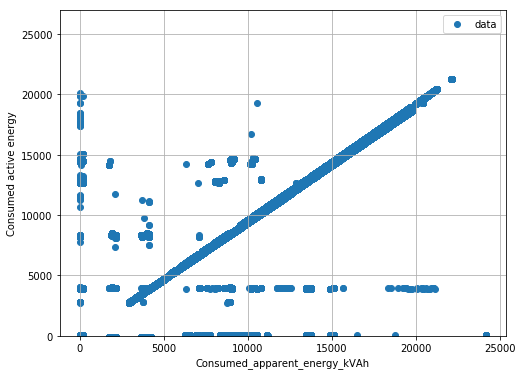

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

data = pd.read_csv('power_test.csv',index_col=0)
target = data['Consumed_active_energy_kW']
source = data['Consumed_apparent_energy_kVAh']
fig = plt.figure(figsize=(8,6))
plt.clf()
plt.grid("on")
plt.ylim(0,27000)
plt.ylabel("Consumed active energy")
plt.xlabel("Consumed_apparent_energy_kVAh")
#plt.plot(source.values,label="Consumed_apparent_energy_kVAh ")
plt.scatter(source.values,target.values,label='data')
plt.legend()
plt.show()

# Data cleansing
1 remove outliner using max, min and increasing values
 (Selected only data rows with CRAC3)

In [100]:
 
csv_file = 'power_test.csv'
key_name  = 'ADB1_CRAC3'
i = 0
j = 0
prev_val = -1 
k = 0 
   
max_val = [20000]

min_val = [2000]
field_num = [56]
increase = True
outfile ='powertest_CRAC3.out.csv'
with open(csv_file) as csv_file, open(outfile,'w') as out_csv:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_writer = csv.writer(out_csv,delimiter=',')
        
        for row in csv_reader:
           if i == 0:
               csv_writer.writerow(row)
               i += 1   # skip the first header row
               header_row = row
               for y in field_num:
                   print ('check field %s\n'%row[y])
               continue
           i =  i + 1
           found = False
           
           for column in row:
               #print(column)
               if column==key_name:
                   found = True;
                   j = j +1
                   break

           if found:
                error = False
                y = 0
                for x in field_num:
                   if increase and prev_val != -1 and prev_val > float(row[x]):
                       #print ('...not incrasing %d %s at row %d'%(prev_val,row[x],i))
                       #print (row)
                       error = True 
                   if max_val and float(row[x]) > max_val[y]:
                       #print ('...greater than outliner data at row %d'%i)
                       #print (row[x])
                       error = True 
                   if min_val and float(row[x]) < min_val[y]:
                       #print ('...less than  outliner data at row %d'%i)
                       #print (row)
                       error = True 
                   if error:
                       break
                   
                if not error:
                   csv_writer.writerow(row)  
                   prev_val = max(prev_val,float(row[x]))
                   y = y + 1
                   k = k +1
                
        print('Processed %d  lines found %d line cleaned line %d'%(i,j,k))
       

check field Consumed_active_energy_kW

Processed 393107  lines found 98352 line cleaned line 91288


# view it after removing outliners

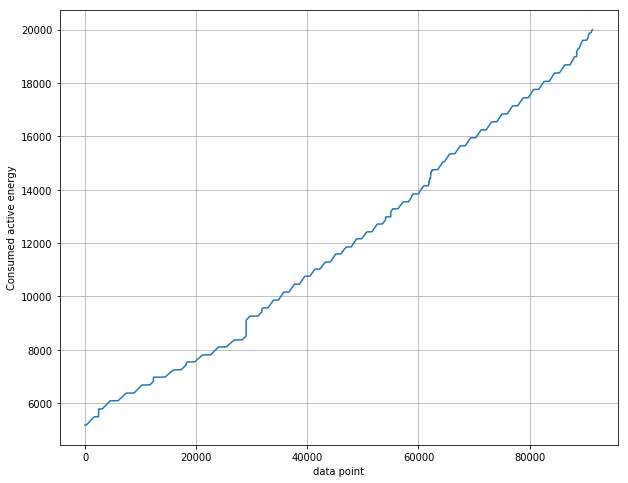

In [101]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

def time_parser(x):
    return pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')


data = pd.read_csv('powertest_CRAC3.out.csv',index_col='Timestamp',parse_dates=True,date_parser=time_parser)

target = data['Consumed_active_energy_kW']
fig = plt.figure(figsize=(10,8))
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.plot(target.values,label="data")
plt.show()
    

# Perform resampling


In [102]:
#perform data cleaning fill missing value
def resample_to_min(series,field_num):  # resample to miniute
    resample = series.resample('1T')
    minutes_data = resample.mean()
    print(minutes_data)
    minutes_data.plot()
    pyplot.show()
    return minutes_data

def fill_missing_value(df,method):
   #df = df.dropna()
   df.index = DatetimeIndex(df.index)
   df = df.interpolate(method=method, axis=0).ffill().bfill()
   print (df)
   df.plot()
   pyplot.show()
   return df 

In [103]:
#remove non-numeric field
del data['dev_name']
 

In [104]:
#select only some fields

cols = ['Consumed_active_energy_kW','Consumed_apparent_energy_kVAh','Consumed_inductive_reactive_energy_kvarhL','Consumed_capacitive_reactive_energy_kvarhC']

series_new = data.filter(cols,axis=1)
 
#series_new= series_new.resample('2min', 'ffill').interpolate()

series_new0 = series_new.resample('30S', 'mean').interpolate()

series_new1 = series_new.resample('2min', 'mean').interpolate()
series_new2  = series_new.resample( '50min', 'mean').interpolate()

series_new3  = series_new.resample( '60min', 'mean').interpolate()

series_new4  = series_new.resample( '60min', 'ffill').interpolate()


print  series_new [:5]
print  series_new0 [:5]
print  series_new1 [:5]

print series_new2 [:5]

print series_new3 [:5]
print series_new4 [:5]

                     Consumed_active_energy_kW  Consumed_apparent_energy_kVAh  \
Timestamp                                                                       
2018-05-16 14:41:16                   5180.743                         5413.0   
2018-05-16 14:41:46                   5180.745                         5413.0   
2018-05-16 14:42:16                   5180.746                         5413.0   
2018-05-16 14:42:46                   5180.748                         5413.0   
2018-05-16 14:43:16                   5180.749                         5413.0   

                     Consumed_inductive_reactive_energy_kvarhL  \
Timestamp                                                        
2018-05-16 14:41:16                                     1446.0   
2018-05-16 14:41:46                                     1446.0   
2018-05-16 14:42:16                                     1446.0   
2018-05-16 14:42:46                                     1446.0   
2018-05-16 14:43:16                 

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if sys.path[0] == '':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:16: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ffill()
  app.launch_new_instance()


In [106]:
#sample the whole fields 
series_new1 = data.resample('1min', 'mean').interpolate()

print(series_new1)
series_new1.to_csv('powertest_CRAC3_2.out.csv')


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


                     Threephase_Power_Factor  Consumed_apparent_energy_VAh  \
Timestamp                                                                    
2018-05-16 14:41:00                    1.000                         756.5   
2018-05-16 14:42:00                    1.000                         759.5   
2018-05-16 14:43:00                    0.830                         762.5   
2018-05-16 14:44:00                    0.750                         765.5   
2018-05-16 14:45:00                    0.830                         769.0   
2018-05-16 14:46:00                    1.000                         772.0   
2018-05-16 14:47:00                    0.830                         775.0   
2018-05-16 14:48:00                    0.830                         778.0   
2018-05-16 14:49:00                    1.000                         781.0   
2018-05-16 14:50:00                    1.000                         784.0   
2018-05-16 14:51:00                    0.830                    

In [107]:
print series_new1[:5]

                     Threephase_Power_Factor  Consumed_apparent_energy_VAh  \
Timestamp                                                                    
2018-05-16 14:41:00                     1.00                         756.5   
2018-05-16 14:42:00                     1.00                         759.5   
2018-05-16 14:43:00                     0.83                         762.5   
2018-05-16 14:44:00                     0.75                         765.5   
2018-05-16 14:45:00                     0.83                         769.0   

                     L2_Current  L1_Active_Power  \
Timestamp                                          
2018-05-16 14:41:00         0.0             0.16   
2018-05-16 14:42:00         0.0             0.16   
2018-05-16 14:43:00         0.0             0.16   
2018-05-16 14:44:00         0.2             0.16   
2018-05-16 14:45:00         0.0             0.16   

                     Consumed_capacitive_reactive_energy_kvarhC  \
Timestamp            

# Plot various resampling data

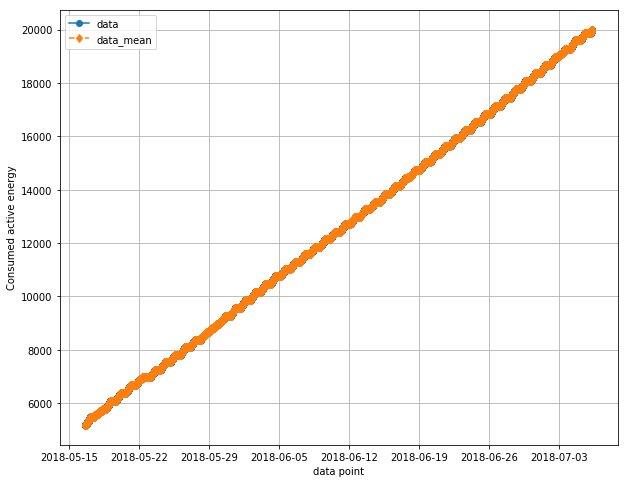

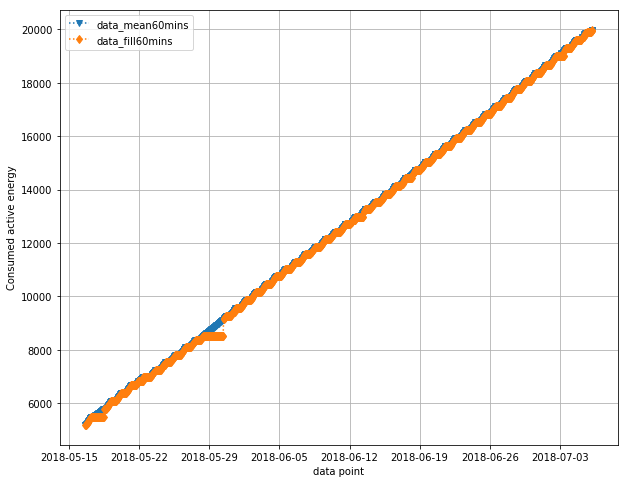

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

target = series_new['Consumed_active_energy_kW']
x_val = series_new.index.values
target1 = series_new1['Consumed_active_energy_kW']
x_val1 = series_new1.index.values
target3 = series_new3['Consumed_active_energy_kW']
x_val3 = series_new3.index.values

target4 = series_new4['Consumed_active_energy_kW']
x_val4 = series_new4.index.values


fig = plt.figure(figsize=(10,8))
plt.clf()
plt.cla()
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")

plt.plot(x_val,target.values,label="data",marker='o')
plt.plot(x_val1,target1.values,label="data_mean",ls='--',marker='d')
 
plt.legend(loc='upper left')
plt.show()

fig = plt.figure(figsize=(10,8))
plt.clf()
plt.cla()
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")

 
plt.plot(x_val3,target3.values,label="data_mean60mins",ls=':',marker='v')
plt.plot(x_val4,target4.values,label="data_fill60mins",ls=':',marker='d')
plt.legend(loc='upper left')
plt.show()


# Viewing various correlation

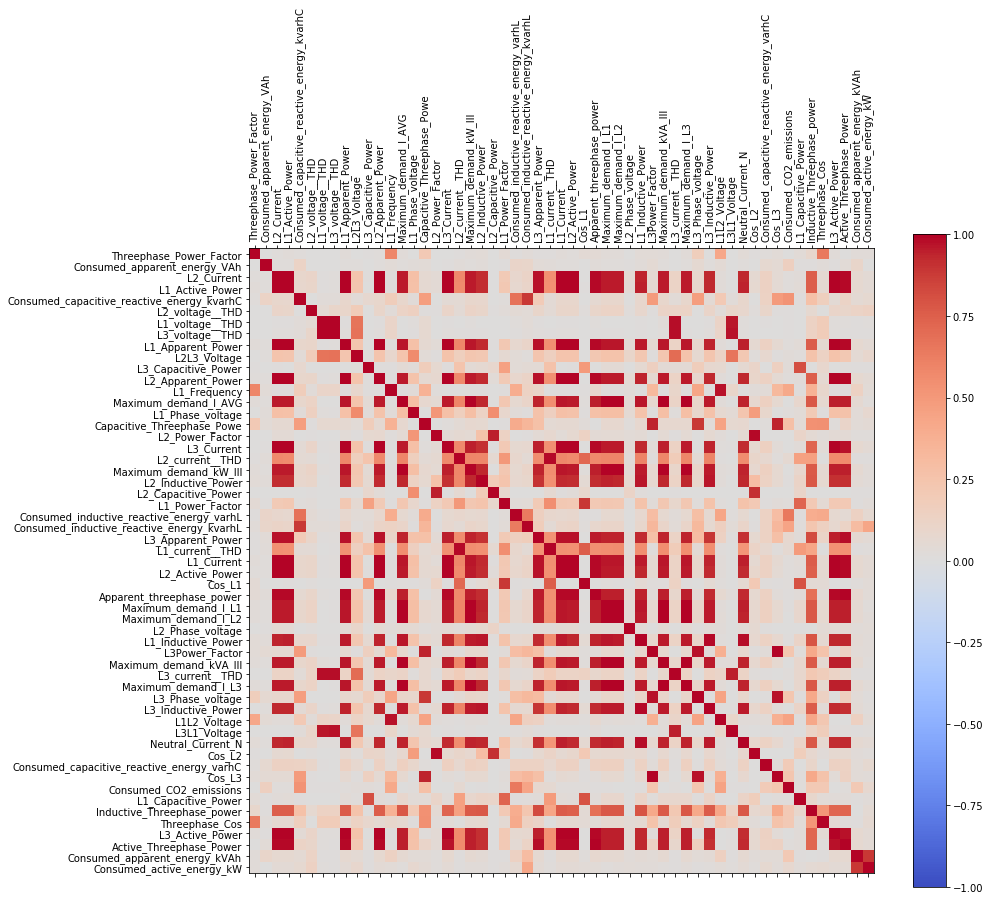

In [111]:
#heatmap
corr = series_new1.corr().abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

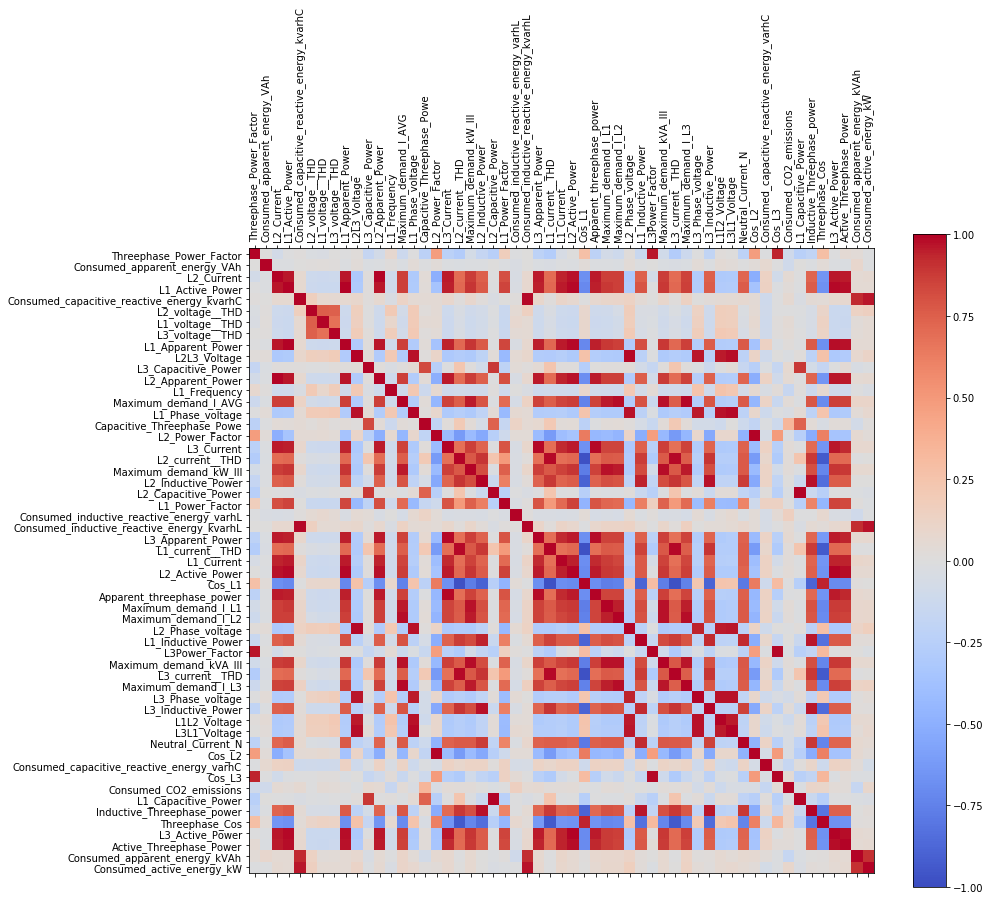

In [112]:
corr = series_new1.corr(method='spearman')
corra = corr.abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

 

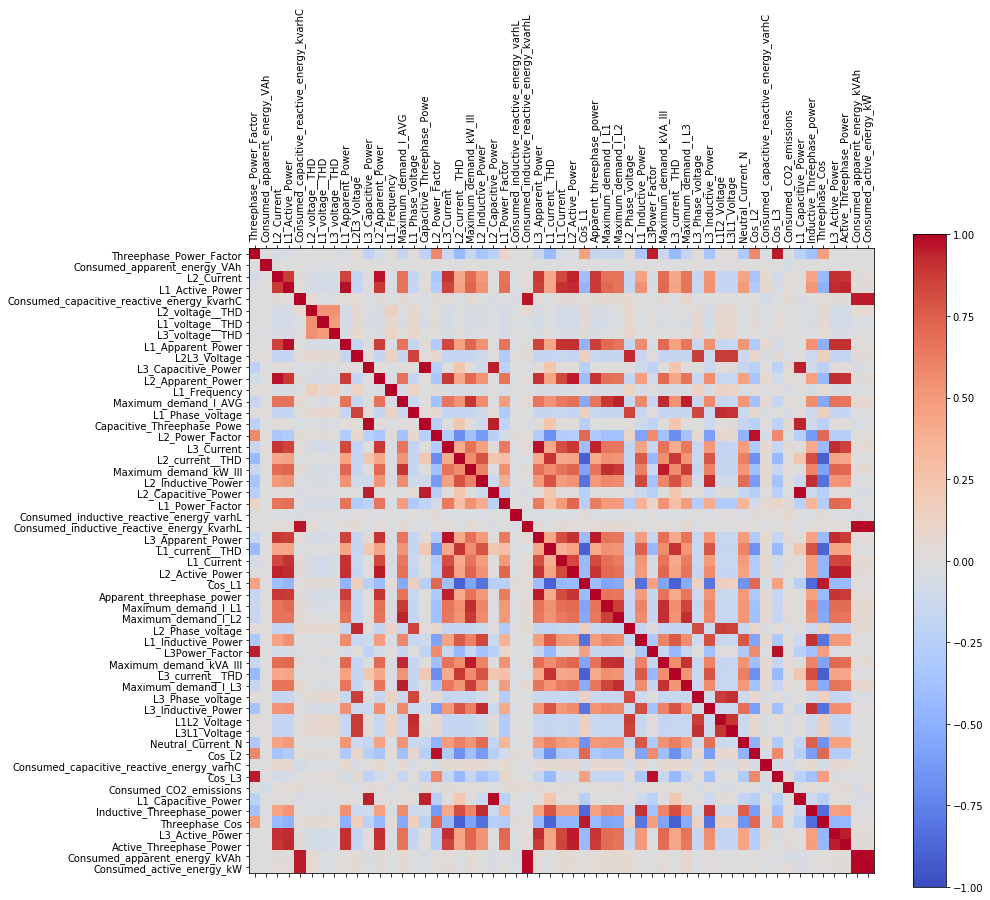

In [110]:
corr = series_new1.corr(method='kendall')
corra = corr.abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()
 

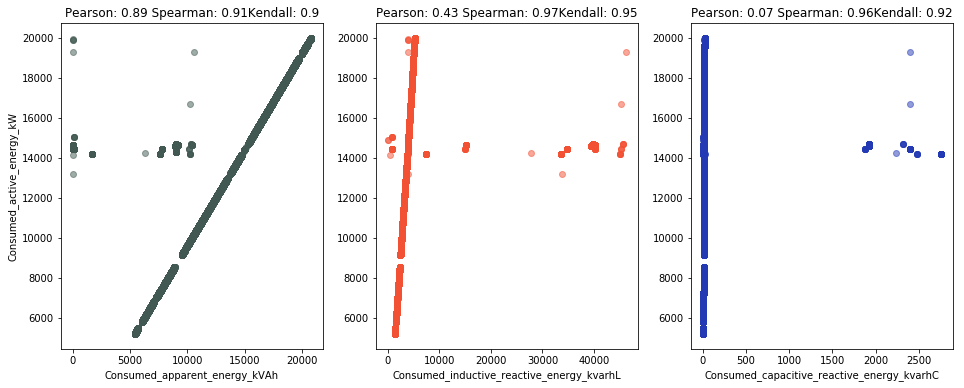

In [113]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]
 

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['Consumed_apparent_energy_kVAh', 'Consumed_inductive_reactive_energy_kvarhL','Consumed_capacitive_reactive_energy_kvarhC']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Consumed_active_energy_kW')
    i.scatter(data[cols[j]], data['Consumed_active_energy_kW'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%series_new1.corr().loc[cols[j]]['Consumed_active_energy_kW'].round(2)+' Spearman: %s'%series_new1.corr(method='spearman').loc[cols[j]]['Consumed_active_energy_kW'].round(2)+'Kendall: %s'%series_new1.corr(method='kendall').loc[cols[j]]['Consumed_active_energy_kW'].round(2))
    j+=1

plt.show()

# Feature selections with top correlation (assume spearman)

In [114]:
#feature selections

from sklearn import linear_model

def getTopKCorr(data,k):
    corr = data.corr().abs()
    #del data['Consumed_active_energy_kW']
    
    corr_ener = corr['Consumed_active_energy_kW'] #ignore the target field in the feature
    del corr_ener['Consumed_active_energy_kW']
    #print corr_ener.values
    #print corr_ener
    idx = (-corr_ener.values).argsort()[:k]
    print corr_ener[idx]
    return corr_ener[idx].index
    
    

In [119]:
target = series_new1['Consumed_active_energy_kW']
                     
#print top 10 features for consumed energy kW

features = getTopKCorr(series_new1,10)
print features

Consumed_apparent_energy_kVAh                 0.885551
Consumed_inductive_reactive_energy_kvarhL     0.432754
L2_voltage__THD                               0.139035
L2L3_Voltage                                  0.080687
Consumed_CO2_emissions                        0.074899
L1_Phase_voltage                              0.074748
Consumed_capacitive_reactive_energy_kvarhC    0.069410
Consumed_capacitive_reactive_energy_varhC     0.066019
Threephase_Cos                                0.056922
Consumed_inductive_reactive_energy_varhL      0.054763
Name: Consumed_active_energy_kW, dtype: float64
Index([u'Consumed_apparent_energy_kVAh',
       u'Consumed_inductive_reactive_energy_kvarhL', u'L2_voltage__THD',
       u'L2L3_Voltage', u'Consumed_CO2_emissions', u'L1_Phase_voltage',
       u'Consumed_capacitive_reactive_energy_kvarhC',
       u'Consumed_capacitive_reactive_energy_varhC', u'Threephase_Cos',
       u'Consumed_inductive_reactive_energy_varhL'],
      dtype='object')


In [120]:
from sklearn import linear_model

#extract target fields
data2 = series_new1.iloc[:, [j for j, c in enumerate(series_new1.columns) if c in features ]]

print data2.columns

 

print  series_new1.columns




Index([u'Consumed_capacitive_reactive_energy_kvarhC', u'L2_voltage__THD',
       u'L2L3_Voltage', u'L1_Phase_voltage',
       u'Consumed_inductive_reactive_energy_varhL',
       u'Consumed_inductive_reactive_energy_kvarhL',
       u'Consumed_capacitive_reactive_energy_varhC', u'Consumed_CO2_emissions',
       u'Threephase_Cos', u'Consumed_apparent_energy_kVAh'],
      dtype='object')
Index([u'Threephase_Power_Factor', u'Consumed_apparent_energy_VAh',
       u'L2_Current', u'L1_Active_Power',
       u'Consumed_capacitive_reactive_energy_kvarhC', u'L2_voltage__THD',
       u'L1_voltage__THD', u'L3_voltage__THD', u'L1_Apparent_Power',
       u'L2L3_Voltage', u'L3_Capacitive_Power', u'L2_Apparent_Power',
       u'L1_Frequency', u'Maximum_demand_I_AVG', u'L1_Phase_voltage',
       u'Capacitive_Threephase_Powe', u'L2_Power_Factor', u'L3_Current',
       u'L2_current__THD', u'Maximum_demand_kW_III', u'L2_Inductive_Power',
       u'L2_Capacitive_Power', u'L1_Power_Factor',
       u'Consumed_in

In [122]:
#remove target fields

 
lm = linear_model.LinearRegression()
print(len(data2))
model = lm.fit(data2,target)

predictions = lm.predict(data2)


72964


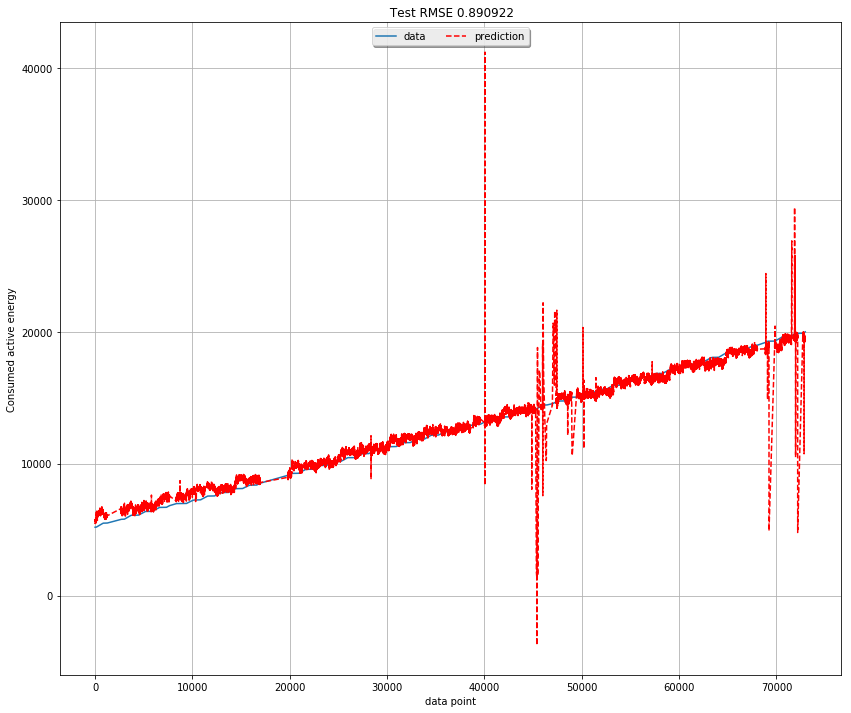

In [124]:


fig = plt.figure(figsize=(14,12))
plt.clf()
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.title(" Test RMSE %f"%(lm.score(data2,target)))
plt.plot(target.values,label="data")
plt.plot(predictions, color='red',linestyle='--',label="prediction")
plt.legend(loc='upper center',  shadow=True, ncol=2)

plt.show()

plt.savefig('predict2.png')

Note there are still noises from other fields that we don't clean.

# Try to use all fields for predictions

In [125]:
from sklearn import linear_model
#use all fields

data2 = series_new1 # use here if we take all fields
series_new1.to_csv('powertest_CRAC3.out.csv')

del data2['Consumed_active_energy_kW']

print  series_new1.columns

Index([u'Threephase_Power_Factor', u'Consumed_apparent_energy_VAh',
       u'L2_Current', u'L1_Active_Power',
       u'Consumed_capacitive_reactive_energy_kvarhC', u'L2_voltage__THD',
       u'L1_voltage__THD', u'L3_voltage__THD', u'L1_Apparent_Power',
       u'L2L3_Voltage', u'L3_Capacitive_Power', u'L2_Apparent_Power',
       u'L1_Frequency', u'Maximum_demand_I_AVG', u'L1_Phase_voltage',
       u'Capacitive_Threephase_Powe', u'L2_Power_Factor', u'L3_Current',
       u'L2_current__THD', u'Maximum_demand_kW_III', u'L2_Inductive_Power',
       u'L2_Capacitive_Power', u'L1_Power_Factor',
       u'Consumed_inductive_reactive_energy_varhL',
       u'Consumed_inductive_reactive_energy_kvarhL', u'L3_Apparent_Power',
       u'L1_current__THD', u'L1_Current', u'L2_Active_Power', u'Cos_L1',
       u'Apparent_threephase_power', u'Maximum_demand_I_L1',
       u'Maximum_demand_I_L2', u'L2_Phase_voltage', u'L1_Inductive_Power',
       u'L3Power_Factor', u'Maximum_demand_kVA_III', u'L3_current__THD'

In [126]:
#remove target fields

 
lm = linear_model.LinearRegression()
model = lm.fit(data2,target)

predictions = lm.predict(data2)

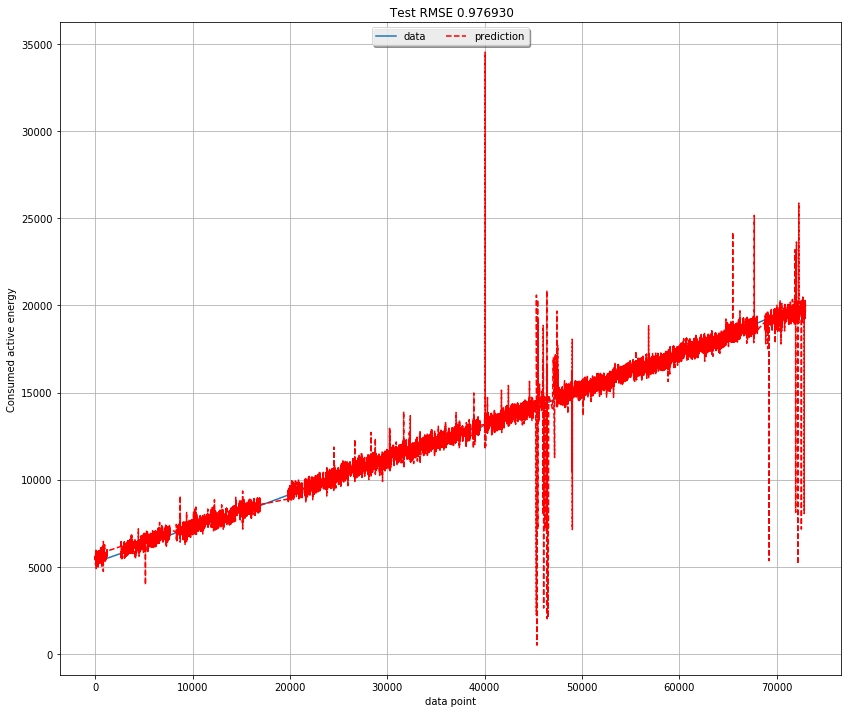

In [77]:

fig = plt.figure(figsize=(14,12))

plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.title(" Test RMSE %f"%(lm.score(data2,target)))
plt.plot(target.values,label="data")
plt.plot(predictions, color='red',linestyle='--',label="prediction")
plt.legend(loc='upper center',  shadow=True, ncol=2)

plt.show()

plt.savefig('predict2.png')